<a href="https://colab.research.google.com/github/apchavezr/16.-Aprendizaje-Profundo-para-Ciencia-de-Datos/blob/main/Clasificacion_Tweets_Colombia_LSTM_Visualizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación de Sentimientos en Tweets(ejemplo simulado)

Este cuaderno muestra cómo construir un modelo básico de PLN para clasificar sentimientos en tweets simulados sobre movilidad, usando Keras con una arquitectura Embedding + LSTM.

El flujo del modelo incluye:

1. Preprocesamiento del texto
2. Tokenización y secuenciación
3. Embedding + LSTM
4. Entrenamiento y evaluación

> Nota: los datos son simulados y deben ser reemplazados por datos reales obtenidos, por ejemplo, con `snscrape`.


In [2]:
import numpy as np
import pandas as pd
import re
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [3]:
# Tweets simulados
tweets = [
    "Me encanta el servicio de transporte en Bogotá",
    "Qué pésimo el servicio de Transmilenio",
    "Hoy el clima está perfecto para caminar por la ciudad",
    "Odio que nunca llegue el bus a tiempo",
    "Excelente atención en el centro de salud",
    "Todo está mal en esta ciudad",
    "Qué alegría ver las calles limpias",
    "Estoy harto de los trancones en la autopista",
    "Muy buena gestión del alcalde",
    "Otra vez sin agua en el barrio"
]

# Etiquetas: 1 positivo, 0 negativo
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

df = pd.DataFrame({'tweet': tweets, 'sentimiento': labels})
df.head()


,tweet,sentimiento
0,Me encanta el servicio de transporte en Bogotá,1
1,Qué pésimo el servicio de Transmilenio,0
2,Hoy el clima está perfecto para caminar por la...,1
3,Odio que nunca llegue el bus a tiempo,0
4,Excelente atención en el centro de salud,1


In [4]:
#Limpiar los datos
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r"http\S+|www\S+", "", texto)
    texto = re.sub(r"[^a-zA-ZáéíóúñÁÉÍÓÚÑ ]", "", texto)
    texto = re.sub(r"\s+", " ", texto).strip()
    return texto

df['tweet_limpio'] = df['tweet'].apply(limpiar_texto)
df.head()


,tweet,sentimiento,tweet_limpio
0,Me encanta el servicio de transporte en Bogotá,1,me encanta el servicio de transporte en bogotá
1,Qué pésimo el servicio de Transmilenio,0,qué pésimo el servicio de transmilenio
2,Hoy el clima está perfecto para caminar por la...,1,hoy el clima está perfecto para caminar por la...
3,Odio que nunca llegue el bus a tiempo,0,odio que nunca llegue el bus a tiempo
4,Excelente atención en el centro de salud,1,excelente atención en el centro de salud


In [11]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['tweet_limpio'])
secuencias = tokenizer.texts_to_sequences(df['tweet_limpio'])

X = pad_sequences(secuencias, maxlen=20)
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=100))  # input_length obligatorio
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

model.build(input_shape=(None, 100))  # Ejemplo si las secuencias tienen longitud 100
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, 100, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,473 (2.63 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
historia = modelo.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=1)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3333 - loss: 0.6951 - val_accuracy: 0.0000e+00 - val_loss: 0.6948
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.6667 - loss: 0.6894 - val_accuracy: 0.5000 - val_loss: 0.6952
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 1.0000 - loss: 0.6837 - val_accuracy: 0.0000e+00 - val_loss: 0.6957
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 1.0000 - loss: 0.6778 - val_accuracy: 0.0000e+00 - val_loss: 0.6964
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 1.0000 - loss: 0.6715 - val_accuracy: 0.0000e+00 - val_loss: 0.6973
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step - accuracy: 1.0000 - loss: 0.6646 - val_accuracy: 0.0000e+00 - val_loss: 0.6984
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 1.0000 - loss: 0.6569 - val_accuracy: 0.0000e+00 - val_loss: 0.6999
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 1.0000 - loss: 0.6482 - val_accurac

In [20]:
predicciones = modelo.predict(X_test)
predicciones_binarias = (predicciones > 0.5).astype("int32")

print(classification_report(y_test, predicciones_binarias))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



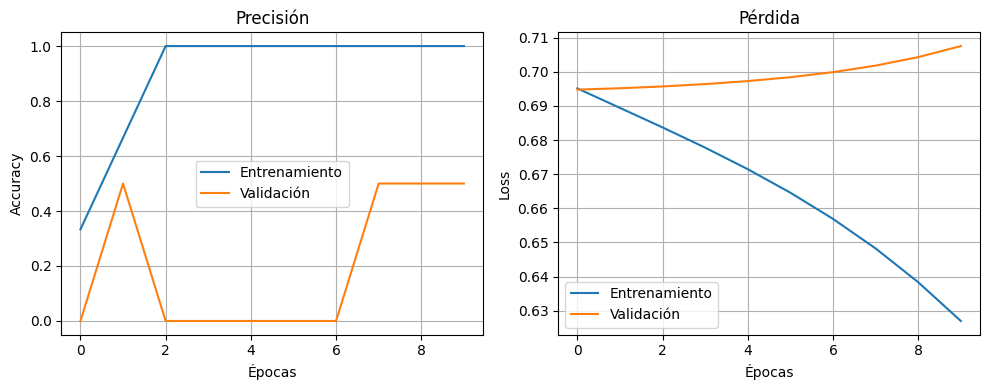

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(historia.history['accuracy'], label='Entrenamiento')
plt.plot(historia.history['val_accuracy'], label='Validación')
plt.title('Precisión')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(historia.history['loss'], label='Entrenamiento')
plt.plot(historia.history['val_loss'], label='Validación')
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


**Gráfico de Precisión**

*  Línea azul (entrenamiento): muestra una subida rápida hasta alcanzar precisión perfecta (1.0) desde la época 2, lo que indica que el modelo aprende muy rápido en los datos de entrenamiento.

*  Línea naranja (validación): es muy inestable. Comienza en 0, sube a 0.5 en la época 1, luego cae nuevamente a 0 y sube otra vez hasta 0.5.

**Interpretación:**

* Hay una desconexión evidente entre entrenamiento y validación, lo cual es un claro síntoma de sobreajuste.

* La precisión de validación es baja y errática, posiblemente por:

  *  Un conjunto de validación pequeño, poco representativo.

  *  Desbalance de clases (por ejemplo, más tweets negativos que positivos).

* Poca aleatoriedad o segmentación deficiente en el train_test_split.

**Gráfico de Pérdida**

 *    Línea azul (entrenamiento): disminuye progresivamente, lo que indica un aprendizaje efectivo sobre los datos de entrenamiento.

 *    Línea naranja (validación): aumenta lentamente durante las épocas, lo cual refuerza el diagnóstico de sobreajuste progresivo.

**Interpretación:**

* El modelo se está ajustando en exceso a los patrones específicos del conjunto de entrenamiento, pero no está aprendiendo generalizaciones útiles para datos nuevos.

* El aumento en la pérdida de validación sugiere que el modelo está empeorando su rendimiento en datos no vistos con cada época adicional.

**Recomendaciones para mejorar el modelo**

* Aumentar el tamaño del dataset, especialmente la partición de validación.

*     Agregar regularización: Dropout, L2 o EarlyStopping.

*  Balancear las clases si hay una desproporción de ejemplos positivos vs. negativos.

*   Hacer validación estratificada, asegurando distribución proporcional de clases en cada conjunto.

*   Reducir la complejidad del modelo: usar menos unidades LSTM o aplicar Bidirectional LSTM con menor profundidad.